<Center>
    <h1 style="font-family: Roboto slab">
        <p>
        <font color="white">
            Sentiment Mining for Amazon Devices: 
            <br>
            Applying Natural Language Processing with Machine Learning and Deep Learning Techniques
        </font>
    </h1>
    <h3 style="font-family: Roboto slab">
        <font color="yellow">
            Notebook 3/5: Exploratory Data Analysis (EDA)
        </font>
    </h3>
</Center>

# I. Introduction & Context
---------------------------------------------------------------------------

### <font color = "yellow" >Objective:</font>
This project aims to build a sentiment analysis tool to classify customer reviews of Amazon devices as positive, negative, or neutral. <br>

The project involves preprocessing review text, extracting key features, and implementing both traditional machine learning models (Logistic Regression, Naive Bayes, Support Vector Machines, ...) and deep learning models (LSTM-based RNNs). After training and evaluating these models, the project will compare their performance to select the most effective one for deployment in the sentiment analysis tool. This approach ensures that the tool utilizes the best-performing model to deliver accurate sentiment classification, ultimately supporting better business decisions and product improvements.

### <font color = "yellow">Application Overview:</font>
This application approach is divided into 5 core steps:

<ul>
    <li>
        <u>Step 1:</u>  Data Collection
        <ul>
            <li> <b>Description:</b> Gather Amazon devices reviews from Amazon's website using web scraping techniques: Selenium, BeautifulSoup, scrape review data to capture review_id, Reviewer, Rating, Date, Review_title, Review_content, Product_id & Product_link</li>
            <li> <b> Output: </b> Raw dataset of Amazon device reviews, including review text, star ratings, and other relevant metadata.</li>
        </ul>
    </li>
</ul>
<ul>
    <li>
        <u>Step 2:</u> Data Pre-Processing
        <ul>
            <li><b> Description: </b> Clean and prepare the review text for exploratory analysis. Identify and resolve missing values or inconsistencies in the dataset. Convert text to lowercase, remove special characters, stop words, punctuations; apply tokenization and lemmatization.
            </li>
            <li> <b> Output: </b> Cleaned dataset for EDA and model development.</li>
        </ul>
    </li>
</ul>
<ul>
    <li>
        <u>Step 3:</u> Exploratory Data Analysis
        <ul>
            <li>Data Distribution: Analyze review counts across sentiment classes. </li>
            <li>Text Analysis: Review text length, word count, and common words.</li>
            <li>Sentiment Visualization: Visualize trends in positive, neutral, and negative reviews.</li>
        </ul>
    </li>
</ul>
<ul>
    <li>
        <u>Step 4:</u > Model Development
         <ul>
            <li>Developing 5 machine learning and LSTM deep learning models.</li>
            <li>Evaluating models performance.</li>
            <li>Selecting the best model for final hyperparameter tuning</li>
            <li>Validating final model's predictions on 10 new real reviews</li>
        </ul>
    </li>
</ul>
<ul>
    <li>
        <u>Step 5:</u> Model Deployment
        <ul>
            <li>Deploy the sentiment analysis model via a Flask API and create a website for users to input reviews and view predicted sentiments in real-time.</li>
        </ul>
    </li>
</ul>

# II. Exploratory Data Analysis
---------------------------------------------------------------------------

## <font color = "red">1.  Libaries Import</font>

In [26]:
# Basic libraries
import pandas as pd
import numpy as np

# For Word Frequencies
from collections import Counter


# For EDA
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from wordcloud import WordCloud


# Suppress FutureWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## <font color="red">2.  Dataset import</font>

In [27]:
# Read reviews from an Excel file
process_reviews = pd.read_excel('../data/cleaned_amazon_reviews.xlsx')

In [28]:
# Check columns and rows
process_reviews.shape

(15791, 10)

In [29]:
# Check data information
process_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15791 entries, 0 to 15790
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_id    15791 non-null  object
 1   Rating       15791 non-null  int64 
 2   Product_id   15791 non-null  object
 3   Review_len   15791 non-null  int64 
 4   Word_count   15791 non-null  int64 
 5   Full_review  15791 non-null  object
 6   Sentiment    15791 non-null  object
 7   Day          15791 non-null  int64 
 8   Month        15791 non-null  int64 
 9   Year         15791 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 1.2+ MB


In [30]:
process_reviews.isnull().sum()

Review_id      0
Rating         0
Product_id     0
Review_len     0
Word_count     0
Full_review    0
Sentiment      0
Day            0
Month          0
Year           0
dtype: int64

In [31]:
process_reviews.head()

,Review_id,Rating,Product_id,Review_len,Word_count,Full_review,Sentiment,Day,Month,Year
0,R192QJ45JRSLTC,5,B08JHCVHTY,2558,356,not think need wish blink subscription basic p...,Positive,13,7,2024
1,RLJN0G2I0CRNC,5,B08JHCVHTY,190,37,worth every penny blink camera house year peac...,Positive,10,12,2024
2,R19D78F9YK0DVA,5,B08JHCVHTY,638,97,quite satisfied use blink subscription plus pl...,Positive,10,11,2024
3,R2W7QUYHDCN6CB,4,B08JHCVHTY,996,189,nice add security really like camera give u st...,Positive,26,9,2024
4,RM9R0N4N310DC,5,B08JHCVHTY,766,114,great item blink subscription plus plan fantas...,Positive,21,10,2024


## <font color="red">3.  Sentiment Distribution</font>

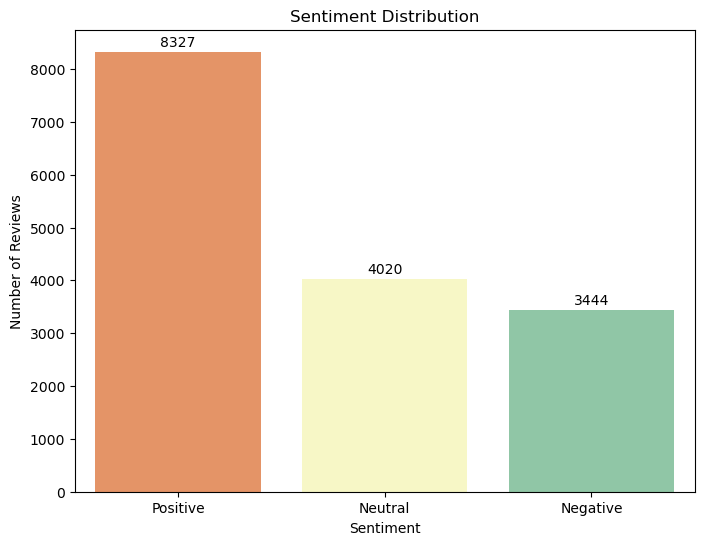

In [32]:
# Count the number of each sentiment type
sentiment_counts = process_reviews['Sentiment'].value_counts()

# Plot the distribution
plt.figure(figsize=(8,6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Spectral')

# Add counts on top of each bar with a small offset
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)  # padding=2 adds space above the bars


plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

The sentiment analysis shows a clear positive trend, with **8,327 positive reviews**, **4,020 neutral**, and **3,444 neutral**. This indicates that most customers had a favorable experience.

## <font color="red">2.  Percentage of Sentiments</font>

Plot a pie chart to show the percentage distribution of each sentiment.

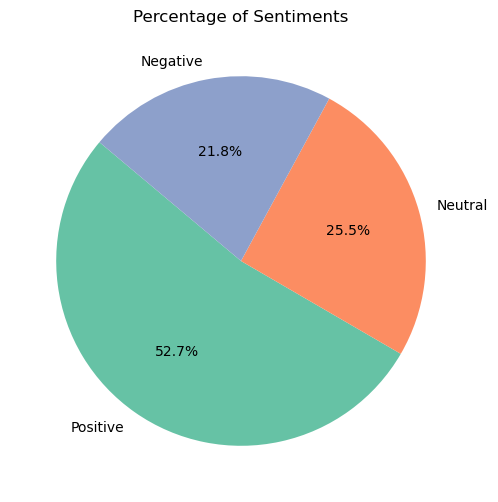

In [33]:
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Percentage of Sentiments')
plt.show()

## <font color="red">3.  Ratings Distribution</font>

Rating
1    1425
2    2019
3    4020
4    2451
5    5876
Name: count, dtype: int64


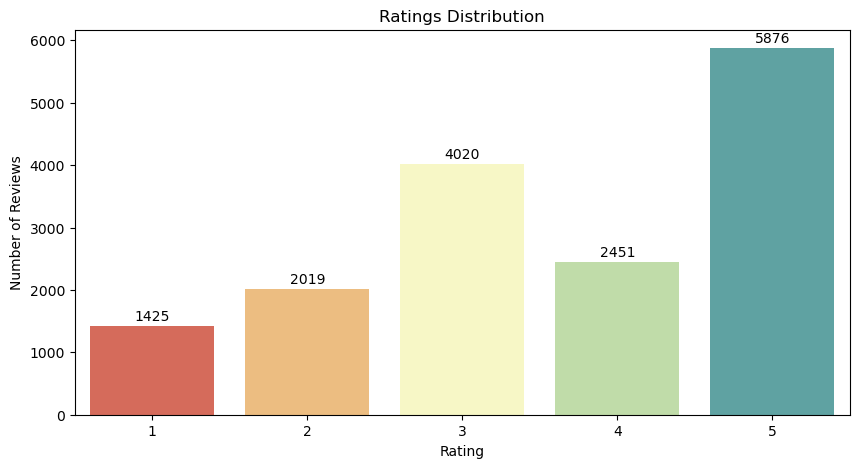

In [34]:
# Count the frequency of each rating
rating_counts = process_reviews['Rating'].value_counts().sort_index()
print(rating_counts)

# Plot the distribution of overall ratings 
plt.figure(figsize=(10,5))
ax = sns.barplot(y=rating_counts.values, x = rating_counts.index, palette='Spectral')

# Add counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)  # padding=2 adds space above the bars

plt.ylabel('Number of Reviews')
plt.xlabel('Rating')
plt.title('Ratings Distribution')
plt.show()

- The ratings are unevenly distributed, with a significantly higher number of 5-star ratings (5876) compared to other ratings. This suggests that most customers tend to leave highly positive feedback.
-  Ratings of 3 stars (4020) are the second most frequent, indicating a sizable proportion of neutral or moderately satisfied customers.
- The data shows a positive skew, with higher ratings (4 and 5 stars) being more common compared to lower ratings (1 and 2 stars).

## <font color="red">4.  Percentage of Ratings</font>

A count plot for ratings and annotates each bar with its percentage of the total. Each bar displays the proportion of ratings as a percentage

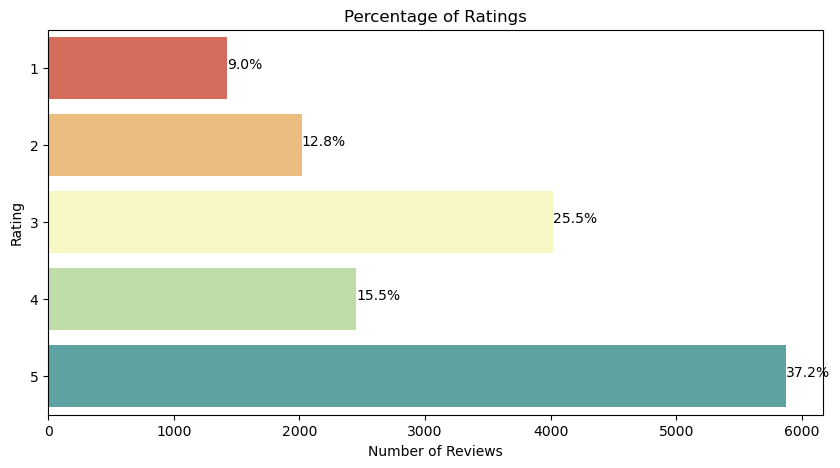

In [35]:
# Creates a horizontal bar plot to show the percentage distribution of each rating
plt.figure(figsize=(10, 5))
plt.title('Percentage of Ratings')
plt.xlabel('Number of Reviews')
ax = sns.countplot(y = 'Rating', data = process_reviews, palette='Spectral')
total = len(process_reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        # p.get_width(): Gets the width of the bar, which represents the count of that specific rating.
        # 100 * p.get_width() / total: Calculates the percentage of each rating by dividing the count by the total number of reviews and multiplying by 100.
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

## <font color="red">5.  Rating distribution by sentiment</font>

Create three separate DataFrames—df_pos, df_neg, and df_neu—by filtering the process_reviews DataFrame based on the values in the Sentiment column.

In [36]:
df_pos = process_reviews[process_reviews["Sentiment"] == "Positive"]
df_neg = process_reviews[process_reviews["Sentiment"] == "Negative"]
df_neu = process_reviews[process_reviews["Sentiment"] == "Neutral"]

In [37]:
# Create a pivot table to get counts of ratings by sentiment
rating_counts = process_reviews.pivot_table(index='Sentiment', columns='Rating', aggfunc='size', fill_value=0)
pd.DataFrame(rating_counts)

Rating,1,2,3,4,5
Sentiment,,,,,
Negative,1425,2019,0,0,0
Neutral,0,0,4020,0,0
Positive,0,0,0,2451,5876


Plot a stacked bar chart to compare rating distribution by sentiment

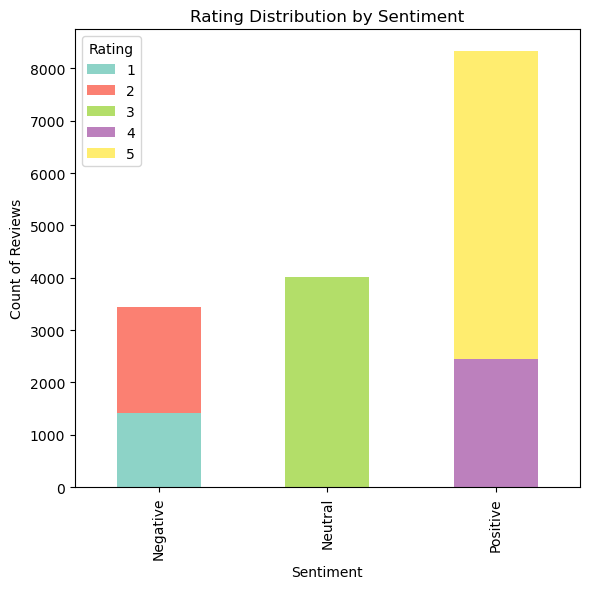

In [38]:
# Plot a stacked bar chart
rating_counts.plot(kind='bar', stacked=True, colormap='Set3', figsize=(6, 6))
plt.title('Rating Distribution by Sentiment')
plt.ylabel('Count of Reviews')
plt.legend(title='Rating', loc='upper left')
plt.tight_layout()
plt.show()

## <font color="red">6.  Review Distribution by Years and Sentiment</font>

In [39]:
# Create a pivot table showing count of review by year and sentiment
year_of_reviews = process_reviews.pivot_table(index='Year', columns='Sentiment', aggfunc='size', fill_value=0)
pd.DataFrame(year_of_reviews)

Sentiment,Negative,Neutral,Positive
Year,,,
2010,0,1,1
2011,0,0,4
2012,0,1,5
2013,1,2,13
2014,0,3,20
2015,4,7,60
2016,8,7,92
2017,16,25,114
2018,10,24,113


Plot a multi-line chart showing the Rewview Distribution over the years for Positive, Neutral, and Negative sentiments

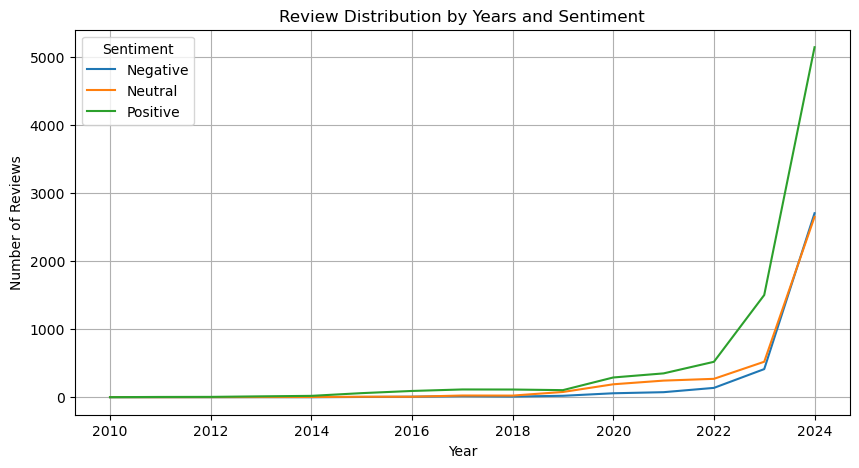

In [40]:
year_of_reviews.plot(figsize=(10,5))
plt.title('Review Distribution by Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()


The review distribution shows a sharp increase in total reviews over time, with positive reviews leading every year.

- 2010–2014: Reviews are minimal, with a slight preference for positive sentiment.
- 2015–2019: Reviews steadily grow, with positive reviews consistently outnumbering neutral and negative ones.
- 2020–2024: Reviews surge, especially in 2024, where positive reviews peak at 5,140, reflecting high customer satisfaction.

Overall, customer engagement and positive sentiment have increased significantly, especially in recent years.

## <font color="red">7.  Review Length Distribution</font>

Plot a histogram showing how review lengths are distributed across the dataset

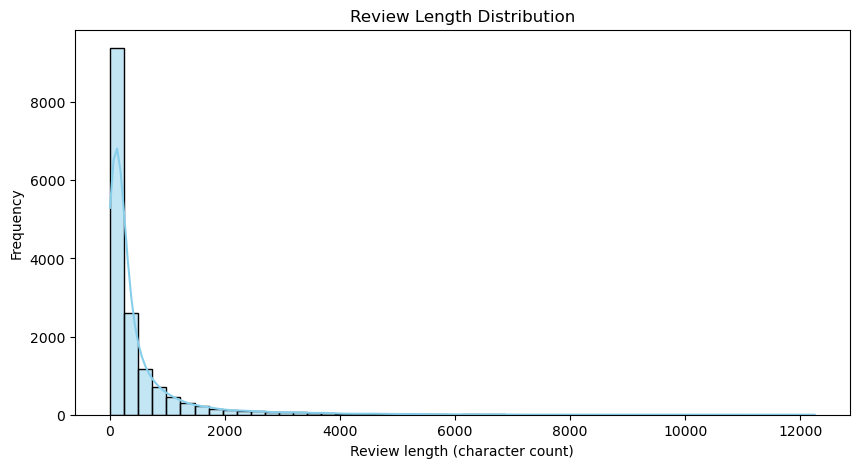

In [41]:
# Plot review length distribution
plt.figure(figsize=(10,5))
sns.histplot(process_reviews['Review_len'], bins=50, kde=True, color='skyblue')
plt.title('Review Length Distribution')
plt.xlabel('Review length (character count)')
plt.ylabel('Frequency')
plt.show()

Review Length is a right skewed distribution with most reviews are short, with the majority under 500 characters. Longer reviews are much less common, indicating that users typically write brief feedback.

## <font color="red">8.  Review Length Distribution by Sentiment</font>

Plot three side-by-side horizontal histoplot, each showing the Review Length Distribution across Positive, Neutral, and Negative sentiments

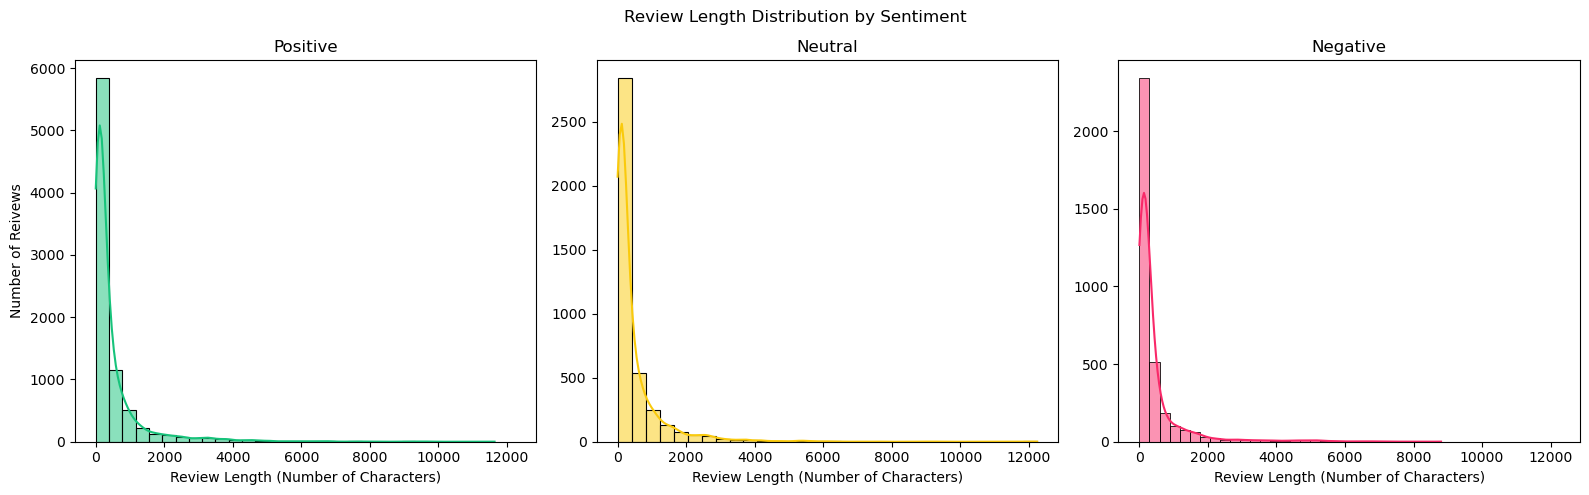

In [42]:
# Create subplots for 3 sentiment categories: 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize = (16,5), sharex=True)
fig.suptitle('Review Length Distribution by Sentiment')

# Plot each sentiment in a separate subplot
sns.histplot(df_pos['Review_len'], ax=axes[0], color="#17C37B", bins=30, kde=True)
axes[0].set_title('Positive')
axes[0].set_xlabel('Review Length (Number of Characters)')
axes[0].set_ylabel('Number of Reivews')

sns.histplot(df_neu['Review_len'], ax=axes[1], color="#FACA0C", bins=30, kde=True)
axes[1].set_title('Neutral')
axes[1].set_xlabel('Review Length (Number of Characters)')
axes[1].set_ylabel('')

sns.histplot(df_neg['Review_len'], ax=axes[2], color="#F92969", bins=30, kde=True)
axes[2].set_title('Negative')
axes[2].set_xlabel('Review Length (Number of Characters)')
axes[2].set_ylabel('')

# Adjust layout and show plot
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust space for main title
plt.show()

The review length distribution by sentiment shows that most reviews, regardless of sentiment, are relatively short, clustering at lower character counts.

- Positive Reviews: The largest volume of reviews, with a strong peak at shorter lengths (under 500 characters) and a gradual decline as length increases.
- Neutral Reviews: Fewer in number than positive reviews but follow a similar distribution, with most reviews being short and few lengthy reviews.
- Negative Reviews: The smallest volume overall, with a similar trend toward shorter reviews, although the distribution is slightly more spread out compared to positive reviews.

Overall, this suggests that users tend to leave brief feedback across all sentiment categories, with positive reviews being the most frequent and shortest on average.

## <font color="red">9.  Review Word Count Distribution</font>

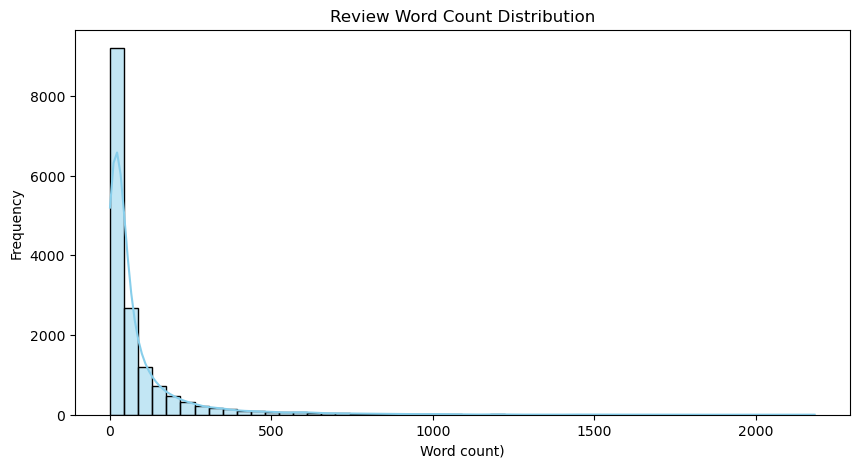

In [43]:
# Plot review length distribution
plt.figure(figsize=(10,5))
sns.histplot(process_reviews['Word_count'], bins=50, kde=True, color='skyblue')
plt.title('Review Word Count Distribution')
plt.xlabel('Word count)')
plt.ylabel('Frequency')
plt.show()

The review word count distribution is highly right-skewed, with the majority of reviews being very short (under 100 words). This shows that users generally leave brief feedback, with only a small number writing detailed reviews.

## <font color="red">10.  Review Word Count Distribution by Sentiment</font>

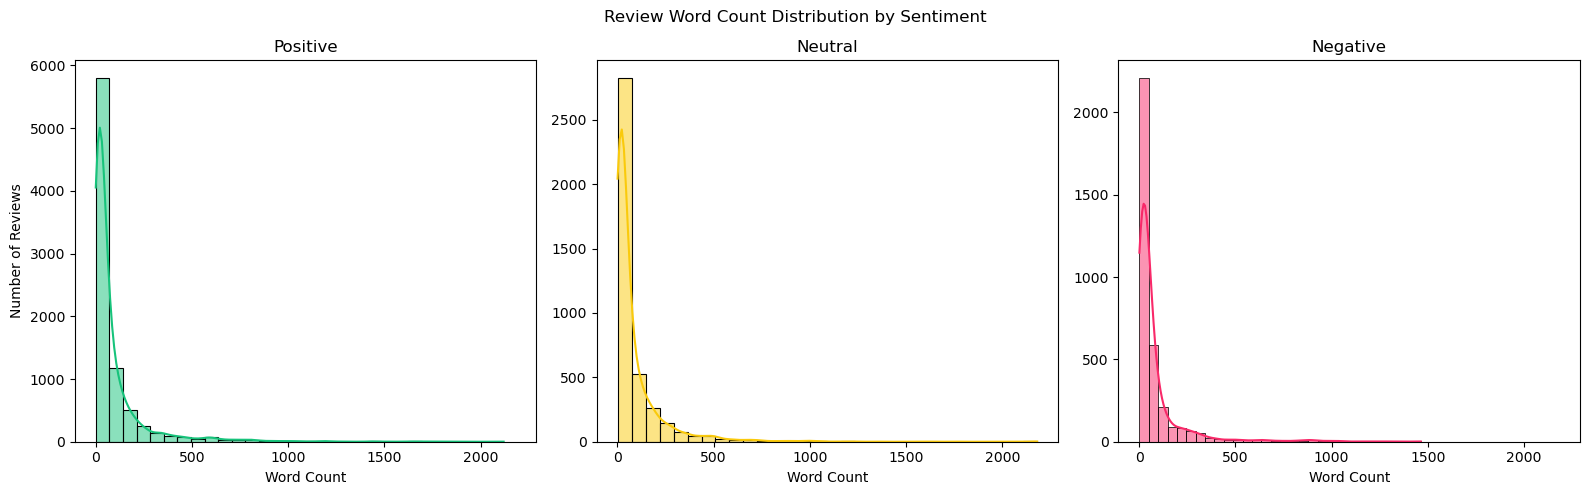

In [44]:
# Create subplots for 3 sentiment categories: 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize = (16,5), sharex=True)
fig.suptitle('Review Word Count Distribution by Sentiment')

# Plot each sentiment in a separate subplot
sns.histplot(df_pos['Word_count'], ax=axes[0], color="#17C37B", bins=30, kde=True)
axes[0].set_title('Positive')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Number of Reviews')

sns.histplot(df_neu['Word_count'], ax=axes[1], color="#FACA0C", bins=30, kde=True)
axes[1].set_title('Neutral')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('')

sns.histplot(df_neg['Word_count'], ax=axes[2], color="#F92969", bins=30, kde=True)
axes[2].set_title('Negative')
axes[2].set_xlabel('Word Count')
axes[2].set_ylabel('')

# Adjust layout and show plot
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust space for main title
plt.show()

The word count distribution by sentiment shows that most reviews are brief across all sentiment categories, with a strong concentration under 100 words.

- Positive Reviews: Have the highest frequency and follow a similar pattern of short length.
- Neutral and Negative Reviews: Also skew heavily toward shorter lengths, though they occur in lower volumes compared to positive reviews.

Overall, regardless of sentiment, users tend to leave short reviews, with only a few extending to longer word counts.

## <font color="red">11.  Average Word Count by Sentiment</font>

Plot a bar chart allows to quickly compare the typical length of reviews across different sentiments.

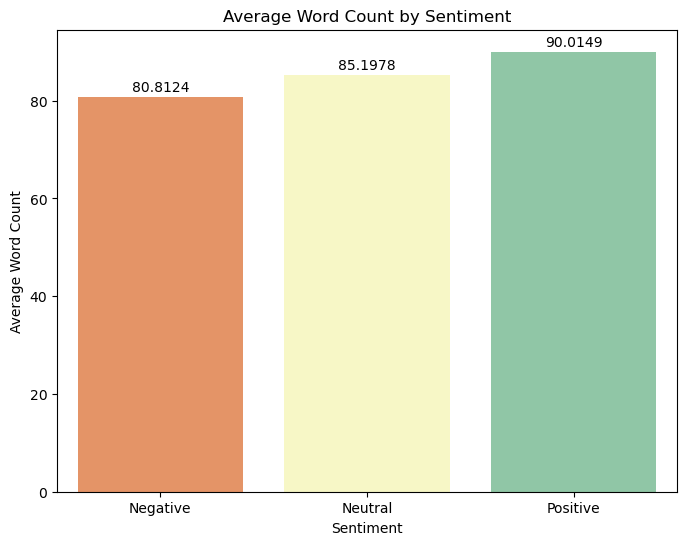

In [45]:
# Calculate average word count by sentiment
avg_word_count_by_sentiment = process_reviews.groupby('Sentiment')['Word_count'].mean().reset_index()

# Plot the average word count by sentiment
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Sentiment', y='Word_count', data=avg_word_count_by_sentiment, palette='Spectral')

# Add counts on top of each bar with a small offset
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)  # padding=2 adds space above the bars

plt.title('Average Word Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Word Count')
plt.show()

- Positive Reviews Are More Descriptive: The longer word count for positive reviews (90 words on average) suggests that satisfied customers are more likely to provide detailed feedback, possibly sharing specific experiences, product features, or benefits they appreciated.
- Neutral Reviews Reflect Balanced Opinions: The moderate word count for neutral reviews (85 words) indicates that customers often take time to explain both positive and negative aspects, leading to balanced or mixed sentiments.
- Negative Reviews Are Concise:: Shorter word counts for negative reviews (80 words) suggest that dissatisfied customers tend to express their frustration briefly and may avoid elaborating further.

## <font color="red">12.  Most Common Words by Sentiment</font>

In [46]:
# Function to get word frequencies
def get_most_common_words (df, exclude_words):
    """
    Get the most common words from a dataframe's text column.

    Parameters:
    - df: DataFrame containing the text data.
    - exclude_words: A set of words to exclude from the count.

    Returns:
    - DataFrame containing the most common words and their counts.
    """
    if exclude_words is None:
        exclude_words = set()  # Default to an empty set

    # Combine all reviews into a single text
    words = ' '.join(df['Full_review']).split()

    # Exclude specified words
    words = [word for word in words if word not in exclude_words]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words
    most_common_words = word_counts.most_common(15)
    return pd.DataFrame(most_common_words, columns=['Word', 'Count'])

In [47]:
# Get most common words by Sentiment

# Exclude "not" from the word count
exclude_words = {"not", "but", "no"}

positive_words = get_most_common_words(df_pos, exclude_words)
neutral_words = get_most_common_words(df_neu, exclude_words)
negative_words = get_most_common_words(df_neg, exclude_words)

Horizontal bar charts of the most common words in positive, neutral, and negative reviews, making it easy to compare frequent terms across sentiments.

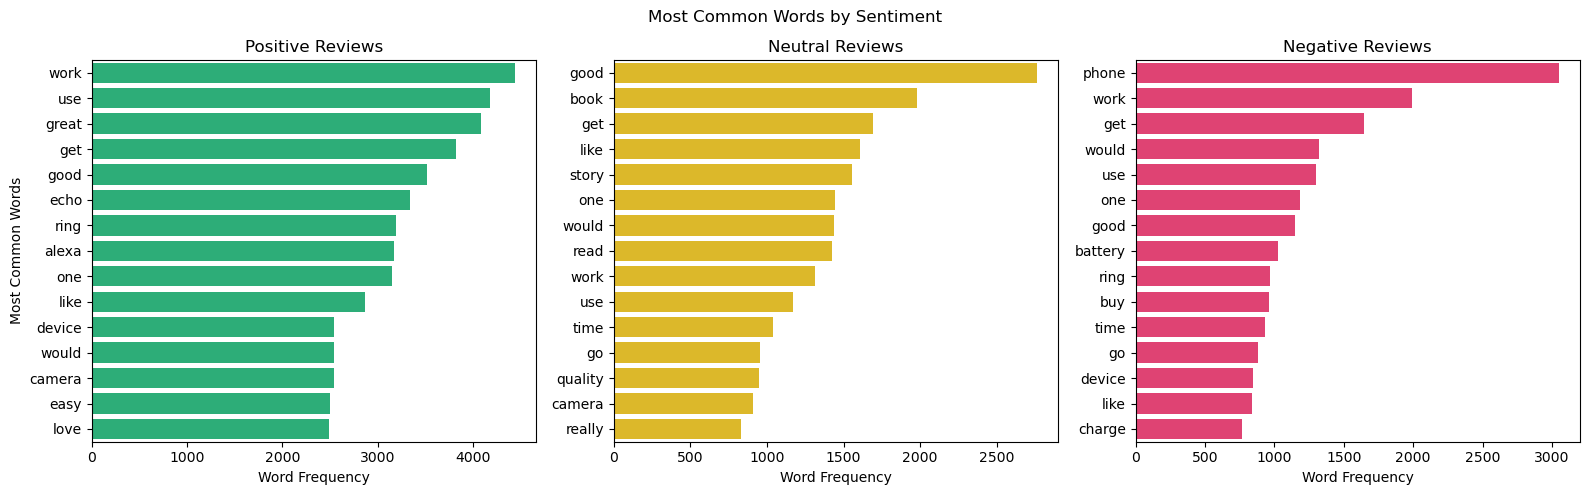

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
plt.suptitle('Most Common Words by Sentiment')

sns.barplot(x='Count', y='Word', data=positive_words, ax=axes[0], color="#17C37B")
axes[0].set_title('Positive Reviews')
axes[0].set_ylabel('Most Common Words')
axes[0].set_xlabel('Word Frequency')

sns.barplot(x='Count', y='Word', data=neutral_words, ax=axes[1], color="#FACA0C")
axes[1].set_title('Neutral Reviews')
axes[1].set_ylabel('')
axes[1].set_xlabel('Word Frequency')

sns.barplot(x='Count', y='Word', data=negative_words, ax=axes[2], color="#F92969")
axes[2].set_title('Negative Reviews')
axes[2].set_ylabel('')
axes[2].set_xlabel('Word Frequency')

plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust space for main title
plt.show()


This analysis highlights how word frequencies align with sentiment, providing insights into what customers value most and where improvements are needed:

- Positive Reviews: Common words like "great," "love," "easy," and "good" suggest customer satisfaction and positive experiences with Amazon devices. Specific product-related terms such as "camera," "ring," "alexa," and "echo" highlight features that are appreciated by users, indicating these may be key drivers of positive sentiment.
- Neutral Reviews: Words like "work," "use," "device," and "amazon" reflect a focus on product functionality rather than strong emotional reactions. Neutral reviews seem more descriptive, providing balanced feedback or factual usage details without strongly favoring or criticizing the product.
- Negative Reviews: Frequent terms such as "buy," "even," "battery," and "light" reveal dissatisfaction or issues with certain aspects of the product. For example, "battery" might point to problems with battery life, while "buy" and "even" could indicate unmet expectations or regrets about the purchase.
- Common Words: Words like "work" and "use" appear across all sentiment categories, emphasizing their relevance to product functionality. However, their context and connotation vary by sentiment, with positive reviews often focusing on effective functionality and negative reviews highlighting when the product fails to meet expectations.

## <font color="red">13.  Word Cloud Analysis by Sentiment</font>

A separate word cloud for each sentiment, highlighting the most common words used in positive, neutral, and negative reviews. Word size in the cloud reflects word frequency, giving a quick visual overview of the most frequent terms in each sentiment category.

In [49]:
# Function to generate and display a Word Cloud for a specific sentiment
def generate_wordcloud(df, color):

    text = ' '.join(df['Full_review'])

    # Exclude "not" from word cloud
    exclude_words = {"not", "but", "no"}

    # Generate word cloud
    wordcloud = WordCloud(width=800, 
                          height=800, 
                          background_color='white',
                          stopwords=exclude_words, 
                          colormap='tab10', 
                          color_func=lambda *args, **kwargs: color, 
                          max_words=50, 
                          min_font_size= 10,
                          prefer_horizontal=1.0).generate(text)
    
    return wordcloud


# Generate word clouds for each sentiment
wordcloud_pos = generate_wordcloud(df_pos, '#17C37B')
wordcloud_neu = generate_wordcloud(df_neu, '#F92969')
wordcloud_neg = generate_wordcloud(df_neg, '#FACA0C')

Subplots display the word clouds for positive, neutral, and negative reviews side by side in a single figure.

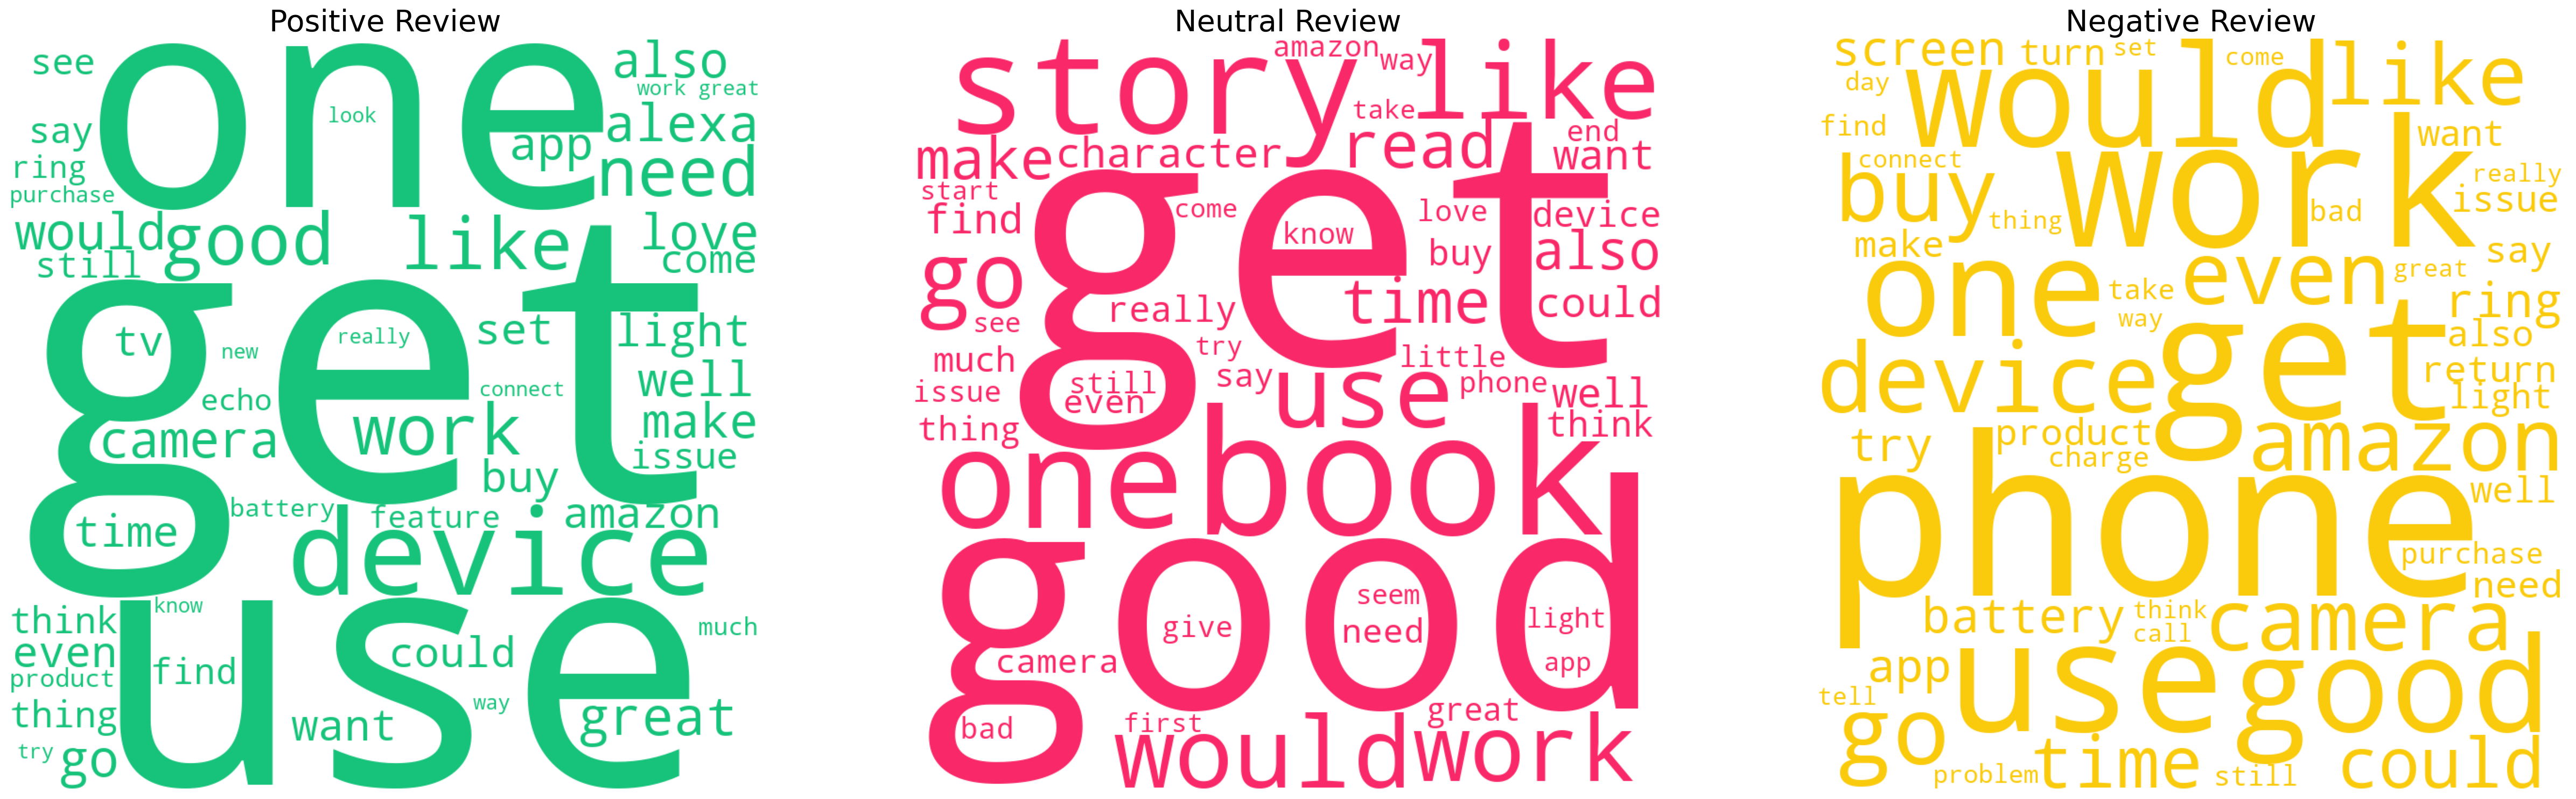

In [50]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(30,20), dpi = 160)
#fig.suptitle('Word Cloud analysis by Sentiment', fontsize = 16)

# Plot each word cloud
axes[0].imshow(wordcloud_pos)
axes[0].set_title('Positive Review', fontdict=dict(size=25))
axes[0].axis('off')

axes[1].imshow(wordcloud_neu)
axes[1].set_title('Neutral Review', fontdict=dict(size=25))
axes[1].axis('off')

axes[2].imshow(wordcloud_neg)
axes[2].set_title('Negative Review', fontdict=dict(size=25))
axes[2].axis('off')

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, top=0.85)
plt.show()

The WordCloud analysis shows key themes across sentiments:

- Positive Reviews: Words like "use," "device," "one," and "love" suggest satisfaction and usability.
- Neutral Reviews: Words such as "work," "use," and "good" indicate a focus on functionality without strong sentiment.
- Negative Reviews: Terms like "work," "issue," "camera," and "return" highlight dissatisfaction and product issues.

In summary, positive reviews focus on usability, neutral reviews on functionality, and negative reviews on problems or unmet expectations.